# Consumer buying behaviour or sales analysis for online shopping

In [1]:
# Import required python libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the corresponding data file
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

In [4]:
# Store the DataFrame in the database as a table named 'consumer_data'
df.to_sql('consumer_data', conn, index=False)

## Data exploration and pre-processing

In [5]:
# Display the first few rows of the dataset using SQL
query = "SELECT * FROM consumer_data LIMIT 5;"
print(pd.read_sql_query(query, conn))

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

#### NOTE: We can perform data exploration using SQL (as above) or pandas as depicted below

In [6]:
# Display the first few rows of the dataset
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [7]:
# Check the data types of each column
print(df.dtypes)


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [8]:
# Check for missing values
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [9]:
# Summary statistics
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

## In-depth Exploratory Data Analysis (EDA) and insights based on the patterns observed in the data

### Seasonal Peaks and Visitor Engagement

The analysis of the frequency distributions for the categorical variables provides valuable insights into consumer behavior and visitor engagement patterns. Firstly, regarding the distribution of months, it is evident that certain periods exhibit notably higher frequencies, notably May, November, March, and December. These months likely signify peak shopping seasons, indicative of heightened consumer activity and purchasing behavior. Such insights are invaluable for businesses seeking to strategically allocate resources and tailor marketing initiatives to capitalize on these periods of heightened demand. Additionally, the seasonal trends inferred from the distribution underscore the importance of aligning promotional efforts and product offerings with the evolving preferences and purchasing behaviors of consumers throughout the year.

Turning to the visitor segmentation based on VisitorType, the prevalence of returning visitors emerges as a prominent trend, with a significant majority identified as such. Conversely, new visitors and a smaller "Other" category constitute the remainder of the dataset. This segmentation offers nuanced insights into the composition of website visitors, providing a basis for tailored marketing strategies and customer engagement initiatives. For instance, while the presence of a loyal base of returning visitors underscores the importance of retention strategies, the identification of new visitors presents opportunities for expansion and acquisition efforts. Businesses can leverage these insights to refine their marketing approaches, fostering customer loyalty among returning visitors while concurrently implementing strategies to attract and convert new visitors to sustain growth and enhance overall customer engagement.

In [10]:
# Frequency distribution for categorical variables
print(df['Month'].value_counts())
print(df['VisitorType'].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


### Insights and Recommendations for Product-Related Behavior Analysis

The analysis of product-related behavior yields several valuable insights into customer engagement and revenue generation on the website. Firstly, it is evident that revenue-generating customers exhibit a higher level of interaction with product-related pages compared to non-revenue-generating customers. On average, revenue-generating customers interact with approximately 48.21 product-related pages, while non-revenue-generating customers interact with approximately 28.71 pages. This suggests that encouraging customers to explore a wider range of product offerings may increase the likelihood of conversion and revenue generation.

Furthermore, the analysis reveals a significant disparity in the duration of product-related page visits between revenue-generating and non-revenue-generating customers. Revenue-generating customers spend, on average, approximately 1876.21 seconds engaging with product-related content, whereas non-revenue-generating customers spend approximately 1069.99 seconds. This indicates that revenue-generating customers demonstrate a deeper level of interest and engagement with the products, potentially signaling an intention to make a purchase. Optimizing the presentation and accessibility of product information to enhance the browsing experience could further encourage prolonged engagement and increase conversion rates.

Additionally, the average page value, representing the monetary value attributed to each page visit, is substantially higher for revenue-generating customers compared to non-revenue-generating customers. Revenue-generating customers contribute an average page value of approximately 27.26, while non-revenue-generating customers contribute approximately 1.98. This underscores the importance of identifying and prioritizing high-value pages to maximize revenue generation. Implementing targeted marketing strategies and personalized recommendations based on the content of these pages can effectively drive conversion and increase average order value.

Lastly, the analysis highlights notable differences in bounce rates and exit rates between revenue-generating and non-revenue-generating customers. Revenue-generating customers exhibit significantly lower bounce rates (approximately 0.0051) and exit rates (approximately 0.0196) compared to their non-revenue-generating counterparts (bounce rate: approximately 0.0253, exit rate: approximately 0.0474). Lower bounce and exit rates signify higher engagement levels and a greater likelihood of continued interaction with the website. Addressing potential barriers to navigation, streamlining the checkout process, and offering incentives for completing purchases can help reduce bounce and exit rates, ultimately facilitating a smoother path to conversion.

In [11]:
# Analyze product-related behavior using SQL
query = """
        SELECT ProductRelated, ProductRelated_Duration, PageValues, BounceRates, ExitRates, Revenue
        FROM consumer_data;
        """
product_behavior = pd.read_sql_query(query, conn)
print(product_behavior.groupby('Revenue').mean())

         ProductRelated  ProductRelated_Duration  PageValues  BounceRates  \
Revenue                                                                     
0             28.714642              1069.987809    1.975998     0.025317   
1             48.210168              1876.209615   27.264518     0.005117   

         ExitRates  
Revenue             
0         0.047378  
1         0.019555  


### Visitor Segmentation Unveils Engagement and Conversion Trends

Analyzing the average number of product-related pages visited by different visitor types yields valuable insights into their behavior and preferences. Returning visitors demonstrate the highest level of engagement with the website, as evidenced by their significantly higher average of 34.08 product-related pages visited. This suggests a strong inclination towards exploring a wider range of products or services compared to other visitor categories.

In contrast, new visitors exhibit a comparatively lower level of engagement, with an average of 18.05 product-related pages visited. This pattern suggests that new visitors may be in an exploratory phase, familiarizing themselves with the offerings and navigating the website for the first time. Meanwhile, visitors categorized as "Other" display an intermediate level of engagement, with an average of 12.47 product-related pages visited.

The observed differences in visitor behavior underscore the importance of tailoring marketing strategies and website experiences to accommodate distinct visitor segments. For instance, optimizing the website's navigation paths and product recommendations based on visitor type can enhance engagement and encourage visitors to explore more pages. Moreover, personalized marketing campaigns targeted towards returning visitors, leveraging their browsing history and preferences, hold potential to drive conversions more effectively.

In [12]:
# Segment consumers by VisitorType using SQL
query = """
        SELECT VisitorType, AVG(ProductRelated) AS Avg_ProductRelated
        FROM consumer_data
        GROUP BY VisitorType;
        """
visitor_segmentation = pd.read_sql_query(query, conn)
print(visitor_segmentation)

         VisitorType  Avg_ProductRelated
0        New_Visitor           18.054900
1              Other           12.470588
2  Returning_Visitor           34.082457


### Decoding Monthly User Engagement Trends

The time-series analysis of monthly behavior unveils significant insights into the fluctuation of user engagement with product-related content across different months. These findings indicate discernible seasonal trends and highlight periods of heightened activity and subdued engagement throughout the year. Notably, November emerges as a peak month, characterized by the highest average number of product-related page visits, reaching 46.04 pages. This surge in user interaction likely correlates with traditional holiday shopping events, particularly Black Friday promotions.

Conversely, February represents a trough in user engagement, recording the lowest average of 11.18 product-related pages visited. Such observations underscore the importance of aligning marketing initiatives and resource allocation with these seasonal fluctuations in user behavior. Leveraging insights from peak periods can inform targeted marketing campaigns and promotional activities to capitalize on heightened user engagement, fostering increased customer acquisition and retention.

Moreover, understanding the underlying factors driving these fluctuations is paramount. Variations in user behavior may reflect shifts in consumer preferences, external influences such as seasonal events or economic conditions, and the efficacy of marketing strategies deployed during specific periods. By conducting a comparative analysis with other relevant metrics such as revenue and bounce rates, businesses can gain deeper insights into the holistic impact of monthly behavior patterns on overall performance.

In [13]:
# Time-series analysis for monthly behavior
monthly_behavior = df.groupby('Month')['ProductRelated'].mean()
print(monthly_behavior)

Month
Aug     38.258661
Dec     27.994789
Feb     11.184783
Jul     36.407407
June    36.065972
Mar     19.808600
May     26.487812
Nov     46.038692
Oct     33.566485
Sep     33.104911
Name: ProductRelated, dtype: float64


### Frequency Trends in Consumer Engagement with Product-Related Pages

The histogram plot illustrates a clear trend in consumer behavior, showcasing a gradual decline in frequency as the number of product-related pages visited increases, peaking within the 0-40 range. This insight underscores the importance of optimizing website layout and content organization to facilitate seamless navigation and enhance user engagement. By strategically prioritizing key product categories and implementing retention strategies beyond the 40-page threshold, businesses can effectively prolong browsing sessions, maximize conversion opportunities, and bolster overall customer satisfaction.

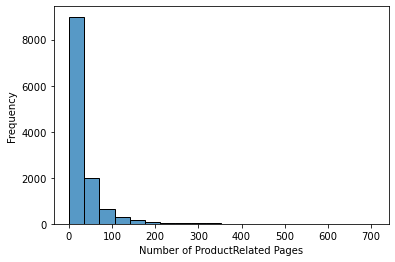

In [14]:
# Histogram of ProductRelated Pages frequency
sns.histplot(df['ProductRelated'], bins=20, kde=False)
plt.xlabel('Number of ProductRelated Pages')
plt.ylabel('Frequency')
plt.show()



In [15]:
# Expore data in Tableau for additional visualizations